In [1]:
import pandas as pd

In [129]:
from skopt import BayesSearchCV

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('showing_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 98 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0.1                               2446 non-null   int64  
 1   Unnamed: 0                                 2446 non-null   int64  
 2   id                                         2446 non-null   int64  
 3   age                                        2446 non-null   int64  
 4   w_diagnosis_mkb                            2323 non-null   object 
 5   duration_of_infertility                    1823 non-null   float64
 6   egg_collection_day_time                    2402 non-null   float64
 7   date_of_embryo_transfer                    2446 non-null   int64  
 8   number_of_eco-tries                        2385 non-null   float64
 9   w_height                                   2446 non-null   int64  
 10  w_weight                

In [4]:
data['complications'] = 0

In [5]:
data['complications'].iloc[data.complications_during_pregnancy.notnull()] = 1

/tmp/ipykernel_4253/3843339653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['complications'].iloc[data.complications_during_pregnancy.notnull()] = 1


In [6]:
data.complications.value_counts()

0    2408
1      38
Name: complications, dtype: int64

In [7]:
data['health_insurance'].value_counts()

ОМС ТерФонд                          542
СОГАЗ СПб / ВТБ                      211
Капитал МС СПб / РГС                 210
ГСМК СПб                             161
РЕСО СПб                             128
ЛО РЕСО-МЕД                           76
Капитал-Полис СПб                     58
ВТБ/Росно СПб                         41
ЛО СОГАЗ-Мед/ВТБ                      41
МАКС СПб                              37
Капитал МС ЛО                         27
Альфа-страхование НОВГОРОД Сибирь      5
Росно/ВТБ Новгород                     4
ФСБ                                    1
Name: health_insurance, dtype: int64

In [8]:
data['outcome_treatment'].value_counts()

Беременность не наступила            1272
Беременность клиническая             1118
Биохимическая беременность             37
Нет данных                              7
CryoET по ОМС                           2
Снята с цикла                           1
Перенос эмбрионов не производился       1
Name: outcome_treatment, dtype: int64

In [9]:
data['target'] = 0

In [10]:
data['target'].iloc[(data.outcome_treatment == 'Беременность клиническая') | (data.outcome_treatment == 'Биохимическая беременность')] = 1

/tmp/ipykernel_4253/2699987630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'].iloc[(data.outcome_treatment == 'Беременность клиническая') | (data.outcome_treatment == 'Биохимическая беременность')] = 1


In [11]:
data['target'].value_counts()

0    1291
1    1155
Name: target, dtype: int64

In [12]:
list_of_strings = ['Нет данных','CryoET по ОМС','Снята с цикла','Перенос эмбрионов не производился']

In [13]:
data = data[~data['outcome_treatment'].isin(list_of_strings)]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2445
Data columns (total 100 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0.1                               2435 non-null   int64  
 1   Unnamed: 0                                 2435 non-null   int64  
 2   id                                         2435 non-null   int64  
 3   age                                        2435 non-null   int64  
 4   w_diagnosis_mkb                            2314 non-null   object 
 5   duration_of_infertility                    1817 non-null   float64
 6   egg_collection_day_time                    2391 non-null   float64
 7   date_of_embryo_transfer                    2435 non-null   int64  
 8   number_of_eco-tries                        2374 non-null   float64
 9   w_height                                   2435 non-null   int64  
 10  w_weight               

In [15]:
data.type_of_infertility.value_counts()

2    1210
1    1077
0     148
Name: type_of_infertility, dtype: int64

In [16]:
data['male_factor'] = 0

In [17]:
data.w_diagnosis_mkb

0                                                     NaN
1       бесплодие i.первичная олигоменоррея.\nn91.3.сп...
2       бесплодие i.первичная олигоменоррея.\nn91.3.сп...
3       бесплодие ii. хронический\nсальпингоофорит. n7...
4       бесплодие ii.фолликулярная киста правого\nяичн...
                              ...                        
2441    бесплодие i.хронический\nсальпингоофорит. n70....
2442    бесплодие i.хронический\nсальпингоофорит. n70....
2443    бесплодие i.хронический\nсальпингоофорит. n70....
2444    бесплодие i.хронический\nсальпингоофорит. n70....
2445    бесплодие ii. приобретенное отсутствие\nоргана...
Name: w_diagnosis_mkb, Length: 2435, dtype: object

In [18]:
data.w_diagnosis_mkb[(data.w_diagnosis_mkb.str.count(r'(мужск)')==1) & (data.w_diagnosis_mkb.str.count(r'(фактор)')==1)]

7       бесплодие i.снижение овариального\nрезерва. му...
8       бесплодие i.гиперпролактинемия.\ne22.1.мужской...
10                          бесплодие ii, мужской фактор.
11                          бесплодие ii, мужской фактор.
22      бесплодие ii. снижение овариального\nрезерва. ...
                              ...                        
2434    бесплодие i.мужской фактор.n97.4\nнарушение жи...
2435    бесплодие ii (комбинированное) n97.8.\nтрубног...
2440    бесплодие i сложное (n97.4 женское\nбесплодие,...
2443    бесплодие i.хронический\nсальпингоофорит. n70....
2444    бесплодие i.хронический\nсальпингоофорит. n70....
Name: w_diagnosis_mkb, Length: 568, dtype: object

In [19]:
data.w_diagnosis_mkb[(data.w_diagnosis_mkb.str.count(r'(мужск)')==1) & ~(data.w_diagnosis_mkb.str.count(r'(фактор)')==1)]

43      бесплодие ii.  состояние после:  рубец на\nмат...
262     бесплодие i,\nабсолютный трубный фактор\nмужск...
335     бесплодие i.миома матки. d25.диффузная\nкистоз...
383     бесплодие i. трубно-перитонеальный\nфактор муж...
429     бесплодие ii сочетанное (n97.1\nтрубно-перитон...
430     бесплодие ii сочетанное (n97.1\nтрубно-перитон...
736     бесплодие i (n 97.4 женское бесплодие,\nобусло...
737     бесплодие i (n 97.4 женское бесплодие,\nобусло...
752     бесплодие i.эрозия шейки матки. мутация\nлейде...
909     бесплодие i (n 97.4 женское бесплодие,\nобусло...
910     бесплодие i (n 97.4 женское бесплодие,\nобусло...
945     бесплодие ii.снижение овариального\nрезерва..п...
946     бесплодие ii.снижение овариального\nрезерва..п...
973     бесплодие ii, связанное с мужскими\nфаторами n...
1199    бесплодие ii. хронический\nсальпингоофорит. n7...
1335    бесплодие i.\nабсолютный трубный фактор\nмужск...
1336    бесплодие i.\nабсолютный трубный фактор\nмужск...
1633    беспло

In [20]:
data.w_diagnosis_mkb[(data.w_diagnosis_mkb.str.count(r'(мужск)')==1)]

7       бесплодие i.снижение овариального\nрезерва. му...
8       бесплодие i.гиперпролактинемия.\ne22.1.мужской...
10                          бесплодие ii, мужской фактор.
11                          бесплодие ii, мужской фактор.
22      бесплодие ii. снижение овариального\nрезерва. ...
                              ...                        
2434    бесплодие i.мужской фактор.n97.4\nнарушение жи...
2435    бесплодие ii (комбинированное) n97.8.\nтрубног...
2440    бесплодие i сложное (n97.4 женское\nбесплодие,...
2443    бесплодие i.хронический\nсальпингоофорит. n70....
2444    бесплодие i.хронический\nсальпингоофорит. n70....
Name: w_diagnosis_mkb, Length: 602, dtype: object

In [21]:
data['male_factor'].iloc[data.w_diagnosis_mkb.str.count(r'(мужск)')==1] = 1

/tmp/ipykernel_4253/3415369532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['male_factor'].iloc[data.w_diagnosis_mkb.str.count(r'(мужск)')==1] = 1


In [22]:
data['male_factor'].value_counts()

0    1833
1     602
Name: male_factor, dtype: int64

In [23]:
data.to_csv('data_for_baseline.csv')

In [24]:
import re

In [25]:
data.w_diagnosis_mkb[data.w_diagnosis_mkb.notnull()] = data.w_diagnosis_mkb[data.w_diagnosis_mkb.notnull()].apply(lambda x: re.sub("[^а-я]", " ", x))

In [26]:
data = data.drop(columns = 'w_diagnosis')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2445
Data columns (total 100 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0.1                               2435 non-null   int64  
 1   Unnamed: 0                                 2435 non-null   int64  
 2   id                                         2435 non-null   int64  
 3   age                                        2435 non-null   int64  
 4   w_diagnosis_mkb                            2314 non-null   object 
 5   duration_of_infertility                    1817 non-null   float64
 6   egg_collection_day_time                    2391 non-null   float64
 7   date_of_embryo_transfer                    2435 non-null   int64  
 8   number_of_eco-tries                        2374 non-null   float64
 9   w_height                                   2435 non-null   int64  
 10  w_weight               

In [28]:
data = data.drop(columns = ['Unnamed: 0.1','Unnamed: 0'])

In [29]:
data.w_diagnosis_mkb[1]

'бесплодие   первичная олигоменоррея        спя        ановуляция        аит        гипотиреоз     '

In [30]:
data.w_diagnosis_mkb = data.w_diagnosis_mkb.fillna('нет')

In [31]:
!pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/home/kate/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/kate/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/home/kate/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/home/kate/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/kate/.local/lib/python3.8/site-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/home/kate/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1368, in render
    

In [32]:
!pip install gensim==3.8.3

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/home/kate/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/kate/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/home/kate/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/home/kate/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/kate/.local/lib/python3.8/site-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/home/kate/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1368, in render
    

In [33]:
import itertools
import string

import numpy as np
import umap.umap_ as umap
from nltk.tokenize import WordPunctTokenizer

from matplotlib import pyplot as plt

from IPython.display import clear_output

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
2022-09-22 12:04:22.120451: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-22 12:04:22.120485: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [34]:
from gensim.models import Word2Vec

In [35]:
tokenizer = WordPunctTokenizer()

In [36]:
print(tokenizer.tokenize(data.w_diagnosis_mkb[1]))

['бесплодие', 'первичная', 'олигоменоррея', 'спя', 'ановуляция', 'аит', 'гипотиреоз']


In [37]:
for token in tokenizer.tokenize(data.w_diagnosis_mkb[1]):
    if token not in stop_words:
        print(token)

NameError: name 'stop_words' is not defined

In [38]:
#dataframe[dataframe.w_diagnosis.notnull()].w_diagnosis = dataframe[dataframe.w_diagnosis.notnull()].w_diagnosis.apply(lambda x: tokenizer.tokenize(x))

In [39]:
#dataframe.w_diagnosis = dataframe.w_diagnosis.apply(lambda x: tokenizer.tokenize(x))

In [40]:
data.w_diagnosis_mkb.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445],
           dtype='int64', length=2435)

In [41]:
from nltk.corpus import stopwords

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/kate/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
stop_words = stopwords.words('russian') 

In [44]:
data_tok = []

In [45]:
for i in data.w_diagnosis_mkb.index:
    temp = data.w_diagnosis_mkb[i].lower()
    data_tok.append(tokenizer.tokenize(temp))


In [48]:
def magic(x):
    return (tokenizer.tokenize(x))

In [49]:
data.w_diagnosis_mkb.apply(lambda x: magic(x))

0                                                   [нет]
1       [бесплодие, первичная, олигоменоррея, спя, ано...
2       [бесплодие, первичная, олигоменоррея, спя, ано...
3       [бесплодие, хронический, сальпингоофорит, рубе...
4       [бесплодие, фолликулярная, киста, правого, яич...
                              ...                        
2441    [бесплодие, хронический, сальпингоофорит, хрон...
2442    [бесплодие, хронический, сальпингоофорит, хрон...
2443    [бесплодие, хронический, сальпингоофорит, днз,...
2444    [бесплодие, хронический, сальпингоофорит, днз,...
2445    [бесплодие, приобретенное, отсутствие, органа,...
Name: w_diagnosis_mkb, Length: 2435, dtype: object

In [50]:
data.w_diagnosis_mkb.apply(lambda x: tokenizer.tokenize(x))

0                                                   [нет]
1       [бесплодие, первичная, олигоменоррея, спя, ано...
2       [бесплодие, первичная, олигоменоррея, спя, ано...
3       [бесплодие, хронический, сальпингоофорит, рубе...
4       [бесплодие, фолликулярная, киста, правого, яич...
                              ...                        
2441    [бесплодие, хронический, сальпингоофорит, хрон...
2442    [бесплодие, хронический, сальпингоофорит, хрон...
2443    [бесплодие, хронический, сальпингоофорит, днз,...
2444    [бесплодие, хронический, сальпингоофорит, днз,...
2445    [бесплодие, приобретенное, отсутствие, органа,...
Name: w_diagnosis_mkb, Length: 2435, dtype: object

In [51]:
data.w_diagnosis_mkb[1]

'бесплодие   первичная олигоменоррея        спя        ановуляция        аит        гипотиреоз     '

In [52]:
model = Word2Vec(data_tok, 
                 size=32,      # embedding vector size
                 min_count=5,  # consider words that occured at least 5 times
                 window=5).wv  # define context as a 5-word window around the target word

In [53]:
model.get_vector('бесплодие')

array([-5.44373512e-01, -1.88716315e-02, -3.66599798e-01,  9.67935249e-02,
       -2.08042815e-01,  1.33179620e-01, -1.96687222e-01,  1.98209897e-01,
        7.37468305e-04,  3.48915607e-02, -4.03640062e-01, -1.79768890e-01,
        1.18101619e-01, -6.69617474e-01, -8.39593768e-01,  1.90265775e-01,
       -1.08041085e-01,  8.87796469e-03,  1.01513267e-01,  8.98759291e-02,
       -3.77990752e-01,  4.50147510e-01, -2.80761570e-01, -5.68533301e-01,
       -4.65117306e-01, -3.40564847e-02,  5.18186986e-01,  1.69093758e-01,
        3.79306376e-01,  3.54077518e-01, -2.71024793e-01,  1.56754702e-01],
      dtype=float32)

In [54]:
data_tok = data.w_diagnosis_mkb.to_numpy()

AttributeError: 'DataFrame' object has no attribute 'w_diagnosis'

In [96]:
#model.key_to_index["нет"]

In [55]:
model.vocab.keys()

dict_keys(['нет', 'бесплодие', 'первичная', 'олигоменоррея', 'спя', 'ановуляция', 'аит', 'гипотиреоз', 'хронический', 'сальпингоофорит', 'рубец', 'на', 'матке', 'кесарево', 'сечение', 'в', 'г', 'фолликулярная', 'киста', 'правого', 'яичника', 'гэ', 'снижение', 'овариального', 'резерва', 'ожирение', 'женское', 'трубно', 'перитонеальное', 'эндометрит', 'мужской', 'фактор', 'азооспремия', 'гиперпролактинемия', 'азооспермия', 'вторичное', 'перитонеальный', 'недостаточность', 'яичников', 'по', 'эндокринное', 'эктопия', 'шейки', 'матки', 'гипогонадотропная', 'аменорея', 'згт', 'нгэ', 'рецидив', 'кисты', 'левого', 'ога', 'комбинированное', 'лечение', 'ст', 'анамнезе', 'неуточненное', 'после', 'миомэктомии', 'параовариальная', 'справа', 'нормогонадотропная', 'и', 'гг', 'рубца', 'субклинический', 'обусловленное', 'эндометриозом', 'эндометриоз', 'тазовой', 'брюшины', 'пр', 'поздний', 'репродуктивный', 'возраст', 'мужским', 'фактором', 'привычное', 'невынашивание', 'беременности', 'резус', 'вынужд

In [95]:

'''words = sorted(model.key_to_index, 
               key=lambda word: model.key_to_index[word],
               reverse=False)[:1000]

print(words)'''

'words = sorted(model.key_to_index, \n               key=lambda word: model.key_to_index[word],\n               reverse=False)[:1000]\n\nprint(words)'

In [56]:
words = sorted(model.vocab.keys(), 
               key=lambda word: model.vocab[word].count,
               reverse=True)[:1000]

print(words[::100])

['бесплодие', 'сторонняя', 'пролеч', 'бронхиальная']


In [57]:
word_vectors = np.array([model.get_vector(word) for word in words])

In [58]:
word_vectors.shape

(330, 32)

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
scaler = StandardScaler()
# map word vectors onto 2d plane with PCA. Use good old sklearn api (fit, transform)
# after that, normalize vectors to make sure they have zero mean and unit variance
word_vectors_pca = pca.fit_transform(word_vectors)# YOUR CODE
word_vectors_pca = scaler.fit_transform(word_vectors_pca)
# and maybe MORE OF YOUR CODE here :)

In [60]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

In [61]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

Figure(id='1004', ...)

In [62]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(word_vectors) # преобразовываем

In [63]:
draw_vectors(embedding[:, 0], embedding[:, 1], token=words)

# hover a mouse over there and see if you can identify the clusters

Figure(id='1114', ...)

In [64]:
'''def get_phrase_embedding(phrase):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros
    
    vector = np.zeros([model.vector_size], dtype='float32')
    phrase_tokenized = tokenizer.tokenize(phrase.lower())# YOUR CODE HERE
    phrase_vectors = [model[x] for x in phrase_tokenized if x in model.key_to_index]

    if len(phrase_vectors) != 0:
        vector = np.mean(phrase_vectors, axis=0)

    # YOUR CODE
    
    return vector
'''

'def get_phrase_embedding(phrase):\n    """\n    Convert phrase to a vector by aggregating it\'s word embeddings. See description above.\n    """\n    # 1. lowercase phrase\n    # 2. tokenize phrase\n    # 3. average word vectors for all words in tokenized phrase\n    # skip words that are not in model\'s vocabulary\n    # if all words are missing from vocabulary, return zeros\n    \n    vector = np.zeros([model.vector_size], dtype=\'float32\')\n    phrase_tokenized = tokenizer.tokenize(phrase.lower())# YOUR CODE HERE\n    phrase_vectors = [model[x] for x in phrase_tokenized if x in model.key_to_index]\n\n    if len(phrase_vectors) != 0:\n        vector = np.mean(phrase_vectors, axis=0)\n\n    # YOUR CODE\n    \n    return vector\n'

In [65]:
def get_phrase_embedding(phrase):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros
    
    vector = np.zeros([model.vector_size], dtype='float32')
    phrase_tokenized = tokenizer.tokenize(phrase.lower())# YOUR CODE HERE
    phrase_vectors = [model[x] for x in phrase_tokenized if x in model.vocab.keys()]

    if len(phrase_vectors) != 0:
        vector = np.mean(phrase_vectors, axis=0)

    # YOUR CODE
    
    return vector

In [66]:
 get_phrase_embedding(data.w_diagnosis_mkb[1])

array([-0.51373506, -0.03121069, -0.3721792 ,  0.10872287, -0.21517126,
        0.11963078, -0.20020135,  0.20063588,  0.01344293,  0.03597687,
       -0.39841992, -0.19221576,  0.12088788, -0.68283314, -0.81786966,
        0.1935542 , -0.10105874,  0.01040602,  0.08786081,  0.1226754 ,
       -0.34616107,  0.44811186, -0.3017473 , -0.5546769 , -0.46848562,
       -0.05432054,  0.5263781 ,  0.16942088,  0.4047818 ,  0.36138228,
       -0.29947874,  0.12081676], dtype=float32)

In [67]:
data.w_diagnosis_mkb.apply(lambda x: get_phrase_embedding(x))

0       [-0.029770454, 0.009733876, -0.011237055, -0.0...
1       [-0.51373506, -0.031210689, -0.3721792, 0.1087...
2       [-0.51373506, -0.031210689, -0.3721792, 0.1087...
3       [-0.5056681, 0.012566661, -0.32935244, 0.08528...
4       [-0.4203023, -0.033849746, -0.29654333, 0.0893...
                              ...                        
2441    [-0.4683325, -0.031334747, -0.3368932, 0.08161...
2442    [-0.4683325, -0.031334747, -0.3368932, 0.08161...
2443    [-0.43834025, -0.026501523, -0.3071638, 0.0867...
2444    [-0.43834025, -0.026501523, -0.3071638, 0.0867...
2445    [-0.3588518, -0.008567124, -0.23845239, 0.0736...
Name: w_diagnosis_mkb, Length: 2435, dtype: object

In [68]:
# let's only consider ~5k phrases for a first run.
chosen_phrases = data.w_diagnosis_mkb[::len(data) // 1000]

# compute vectors for chosen phrases and turn them to numpy array
phrase_vectors = np.asarray([get_phrase_embedding(x) for x in chosen_phrases]) 

In [69]:
phrase_vectors_2d = umap.UMAP(n_neighbors=3).fit_transform(phrase_vectors) # преобразовываем

In [70]:
draw_vectors(phrase_vectors_2d[:, 0], phrase_vectors_2d[:, 1],
             phrase=[phrase[:50] for phrase in chosen_phrases],
             radius=20,)

Figure(id='1235', ...)

In [71]:
len([ 0.15614836, -0.6001412 ,  0.4271627 , -0.08722211,  0.01036583,
       -0.32383528,  0.3313229 ,  0.4013551 , -0.7399594 , -0.0505691 ,
        0.2336077 , -0.6274373 , -0.13587238, -0.205341  ,  0.23683323,
        0.23938188,  0.25931272,  0.38044634,  0.01667961,  0.6297942 ,
        0.81810933,  0.8307138 ,  0.6526164 , -0.22683217, -0.01555481,
        0.33554125, -0.59176004,  0.5155902 ,  0.13769917, -0.48253125,
        0.1749754 ,  0.42486295])

32

In [72]:
data.w_diagnosis_mkb[0]

'нет'

In [73]:
data_vectors = np.vstack([get_phrase_embedding(l) for l in data.w_diagnosis_mkb])

In [74]:
data_vectors

array([[-0.02977045,  0.00973388, -0.01123706, ...,  0.01026323,
        -0.00368707,  0.01316389],
       [-0.51373506, -0.03121069, -0.3721792 , ...,  0.36138228,
        -0.29947874,  0.12081676],
       [-0.51373506, -0.03121069, -0.3721792 , ...,  0.36138228,
        -0.29947874,  0.12081676],
       ...,
       [-0.43834025, -0.02650152, -0.3071638 , ...,  0.31114328,
        -0.24000825,  0.10530464],
       [-0.43834025, -0.02650152, -0.3071638 , ...,  0.31114328,
        -0.24000825,  0.10530464],
       [-0.3588518 , -0.00856712, -0.23845239, ...,  0.24918166,
        -0.18349493,  0.0960633 ]], dtype=float32)

In [105]:
naming = [str(x)+'_embedding' for x in range(32)]

In [106]:
pd.DataFrame(data_vectors, columns= naming)

,0_embedding,1_embedding,2_embedding,3_embedding,4_embedding,5_embedding,6_embedding,7_embedding,8_embedding,9_embedding,...,22_embedding,23_embedding,24_embedding,25_embedding,26_embedding,27_embedding,28_embedding,29_embedding,30_embedding,31_embedding
0,-0.029770,0.009734,-0.011237,-0.010331,-0.004022,-0.005300,-0.003714,0.010899,-0.006699,0.003444,...,-0.014543,-0.017277,-0.017557,0.002057,0.025211,0.001265,0.010579,0.010263,-0.003687,0.013164
1,-0.513735,-0.031211,-0.372179,0.108723,-0.215171,0.119631,-0.200201,0.200636,0.013443,0.035977,...,-0.301747,-0.554677,-0.468486,-0.054321,0.526378,0.169421,0.404782,0.361382,-0.299479,0.120817
2,-0.513735,-0.031211,-0.372179,0.108723,-0.215171,0.119631,-0.200201,0.200636,0.013443,0.035977,...,-0.301747,-0.554677,-0.468486,-0.054321,0.526378,0.169421,0.404782,0.361382,-0.299479,0.120817
3,-0.505668,0.012567,-0.329352,0.085286,-0.185237,0.112850,-0.184629,0.213583,0.012734,0.047075,...,-0.321772,-0.565698,-0.486313,-0.043655,0.515241,0.180275,0.389289,0.369379,-0.252701,0.124300
4,-0.420302,-0.033850,-0.296543,0.089303,-0.175437,0.091918,-0.166493,0.172853,0.006670,0.035308,...,-0.243560,-0.474671,-0.395400,-0.036236,0.454099,0.137573,0.345500,0.310050,-0.247431,0.101663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,-0.468332,-0.031335,-0.336893,0.081611,-0.180588,0.101112,-0.175200,0.185549,0.020084,0.035811,...,-0.269358,-0.516584,-0.445610,-0.041719,0.495026,0.161530,0.353552,0.343836,-0.267066,0.127945
2431,-0.468332,-0.031335,-0.336893,0.081611,-0.180588,0.101112,-0.175200,0.185549,0.020084,0.035811,...,-0.269358,-0.516584,-0.445610,-0.041719,0.495026,0.161530,0.353552,0.343836,-0.267066,0.127945
2432,-0.438340,-0.026502,-0.307164,0.086800,-0.171283,0.097792,-0.158866,0.171551,0.002556,0.030311,...,-0.248173,-0.465698,-0.399930,-0.032701,0.437003,0.138102,0.335663,0.311143,-0.240008,0.105305
2433,-0.438340,-0.026502,-0.307164,0.086800,-0.171283,0.097792,-0.158866,0.171551,0.002556,0.030311,...,-0.248173,-0.465698,-0.399930,-0.032701,0.437003,0.138102,0.335663,0.311143,-0.240008,0.105305


In [107]:
data_phrase_embedding = pd.DataFrame(data_vectors,  columns= naming)

In [108]:
dataframe = pd.merge(data, data_phrase_embedding, left_index=True, right_index=True)

In [109]:
dataframe.columns[31]

'donor_sperm'

In [112]:
dataframe.columns[:98]

Index(['id', 'age', 'w_diagnosis_mkb', 'duration_of_infertility',
       'egg_collection_day_time', 'date_of_embryo_transfer',
       'number_of_eco-tries', 'w_height', 'w_weight', 'w_bmi', 'protocol',
       'gonadotropins', 'starting_dose ', 'trigger',
       'duration_of_ovarian_stimulation ', 'cycle_day_puncture',
       'cycle_day_transfer', 'punctuated', 'flushed', 'num_oocytes',
       'mature_oocytes', 'endometrial_thickness_mm', 'embryologist',
       'num_of_cultivation_hours', 'embryo_biopsy', 'method_embryo_biopsy',
       'ECO', 'sperm_injection', 'own_frozen_oocytes', 'crio_donor_oocytes',
       'fresh_donor_oocytes', 'donor_sperm', 'donor_embryos_after_testing',
       'donor_embryos_without_testing', 'crio_sperm', 'fresh_sperm',
       'crio_sperm_obtained_surgery', 'fresh_sperm_obtained_surgery',
       'thawed_embryos', 'num_embryos_transferred', 'ejaculate_volume_ml',
       'concen_sperm_cells', 'mobility_of_sperm_%', 'anomal_sperm_%',
       'normal_sperm_by_embry

In [113]:
list_of_unnull = []
list_of_null = []

In [114]:
for name in dataframe.columns:
    if getattr(dataframe, name).isnull().any(axis=0) == False:
        list_of_unnull.append(name)
    else:
        list_of_null.append(name)

In [132]:
dataframe[list_of_null].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424 entries, 0 to 2434
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   duration_of_infertility           1810 non-null   float64
 1   egg_collection_day_time           2383 non-null   float64
 2   number_of_eco-tries               2363 non-null   float64
 3   w_weight                          2415 non-null   float64
 4   protocol                          2250 non-null   object 
 5   gonadotropins                     2353 non-null   object 
 6   starting_dose                     2353 non-null   object 
 7   trigger                           2265 non-null   object 
 8   duration_of_ovarian_stimulation   2253 non-null   float64
 9   cycle_day_puncture                2376 non-null   float64
 10  cycle_day_transfer                2357 non-null   float64
 11  punctuated                        2219 non-null   float64
 12  flushe

In [116]:
dataframe[list_of_unnull].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2424 entries, 0 to 2434
Data columns (total 89 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2424 non-null   int64  
 1   age                                        2424 non-null   int64  
 2   w_diagnosis_mkb                            2424 non-null   object 
 3   date_of_embryo_transfer                    2424 non-null   int64  
 4   w_height                                   2424 non-null   int64  
 5   w_bmi                                      2424 non-null   float64
 6   mature_oocytes                             2424 non-null   int64  
 7   num_of_cultivation_hours                   2424 non-null   int64  
 8   embryo_biopsy                              2424 non-null   int64  
 9   ECO                                        2424 non-null   int64  
 10  sperm_injection         

In [118]:
list_of_unnull.remove('w_diagnosis_mkb')

In [120]:
X = dataframe[list_of_unnull]

In [121]:
y = dataframe['target']

In [122]:
X = X.drop(columns = 'target')

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [124]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train,  
        eval_set=(X_val, y_val), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [125]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
#     verbose=5,
)

clf.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
)

Learning rate set to 0.276656
0:	learn: 0.6786271	test: 0.6820917	best: 0.6820917 (0)	total: 14.7ms	remaining: 132ms
1:	learn: 0.6637986	test: 0.6703485	best: 0.6703485 (1)	total: 20.5ms	remaining: 82.2ms
2:	learn: 0.6571799	test: 0.6691676	best: 0.6691676 (2)	total: 23.8ms	remaining: 55.5ms
3:	learn: 0.6479311	test: 0.6605939	best: 0.6605939 (3)	total: 27.1ms	remaining: 40.6ms
4:	learn: 0.6408773	test: 0.6584204	best: 0.6584204 (4)	total: 30.6ms	remaining: 30.6ms
5:	learn: 0.6333600	test: 0.6590700	best: 0.6584204 (4)	total: 34ms	remaining: 22.7ms
6:	learn: 0.6220063	test: 0.6545045	best: 0.6545045 (6)	total: 37ms	remaining: 15.9ms
7:	learn: 0.6162631	test: 0.6532715	best: 0.6532715 (7)	total: 39.9ms	remaining: 9.96ms
8:	learn: 0.6048905	test: 0.6501263	best: 0.6501263 (8)	total: 42.7ms	remaining: 4.74ms
9:	learn: 0.5951242	test: 0.6516289	best: 0.6501263 (8)	total: 45.4ms	remaining: 0us

bestTest = 0.6501262986
bestIteration = 8

Shrink model to first 9 iterations.


In [126]:
clf.get_feature_importance

<bound method CatBoost.get_feature_importance of <catboost.core.CatBoostClassifier object at 0x7f6d7c18cb80>>

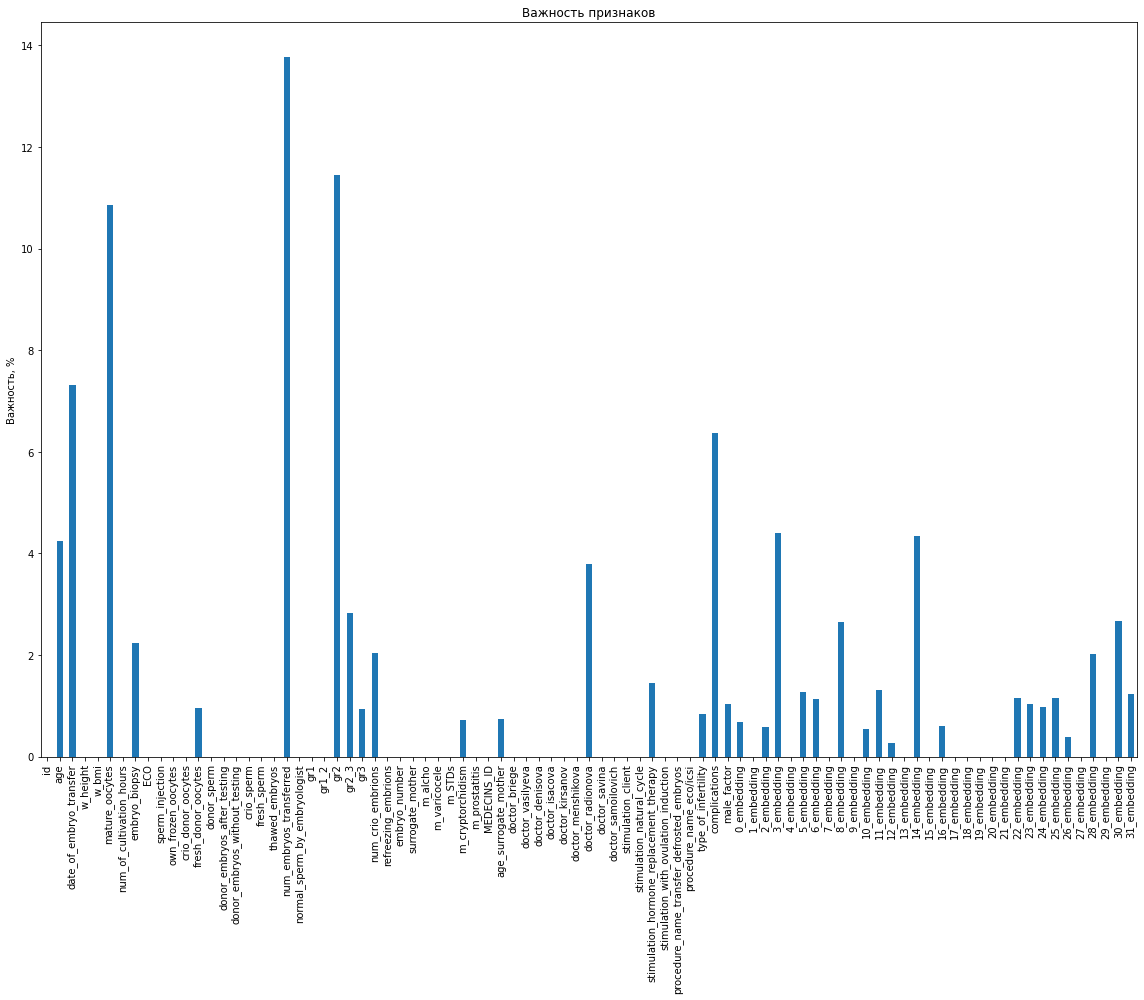

In [128]:
cat_imp = pd.Series(clf.get_feature_importance(),
                         X.columns)
fig, ax = plt.subplots(figsize=(16,14))
cat_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность, %')
fig.tight_layout()

In [131]:
opt = BayesSearchCV(
    RandomForestClassifier(),
    {
        'n_estimators': (100, 200),
        'criterion': ['entropy','log_loss'],
        'max_depth': (8, 15),
        'min_samples_split': (3,7)
    },
    n_iter=32,
    cv=3
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_val, y_val))

val. score: 0.5992761702419518
test score: 0.6391752577319587
